##Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
realclass = pd.read_csv('realclass.csv')

In [ ]:
dataTest = pd.read_csv('test.csv')
dataTest.head(5)

,trustLevel|totalScanTimeInSeconds|grandTotal|lineItemVoids|scansWithoutRegistration|quantityModifications|scannedLineItemsPerSecond|valuePerSecond|lineItemVoidsPerPosition
0,4|467|88.48|4|8|4|0.0149892933618844|0.1894646...
1,3|1004|58.99|7|6|1|0.0268924302788845|0.058754...
2,1|162|14|4|5|4|0.00617283950617284|0.086419753...
3,5|532|84.79|9|3|4|0.0263157894736842|0.1593796...
4,5|890|42.16|4|0|0|0.0213483146067416|0.0473707...


In [ ]:
dataTrain = pd.read_csv('train.csv') 
dataTrain.tail(5)

,trustLevel|totalScanTimeInSeconds|grandTotal|lineItemVoids|scansWithoutRegistration|quantityModifications|scannedLineItemsPerSecond|valuePerSecond|lineItemVoidsPerPosition|fraud
1874,1|321|76.03|8|7|2|0.0716510903426791|0.2368535...
1875,1|397|41.89|5|5|0|0.0654911838790932|0.1055163...
1876,4|316|41.83|5|8|1|0.0949367088607595|0.1323734...
1877,2|685|62.68|1|6|2|0.035036496350365|0.09150364...
1878,4|1140|38.03|2|2|3|0.0166666666666667|0.033359...


In [ ]:
dataTest = pd.read_csv('test.csv', sep='|')
dataTest.head(5)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [ ]:
#dataTest = pd.read_csv('test.csv', sep='|')
#dataTest.head(5)

In [ ]:
dataTrain = pd.read_csv('train.csv', sep='|') 
dataTrain.tail(5)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0
1878,4,1140,38.03,2,2,3,0.016667,0.033360,0.105263,0


In [ ]:
dataTrain.tail(1)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
1878,4,1140,38.03,2,2,3,0.016667,0.03336,0.105263,0


In [ ]:
dataTest.tail(1)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
498120,3,1456,56.97,11,7,2,0.019231,0.039128,0.392857


In [ ]:
dataTest.shape

(498121, 9)

In [ ]:
dataTrain.shape

(1879, 10)

##Exploration

In [ ]:
import seaborn as sns

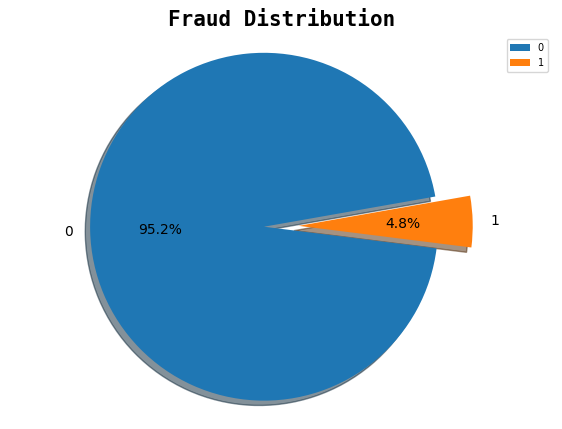

In [ ]:
fraud = realclass['fraud'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20), shadow=True, autopct='%1.1f%%')
plt.title('Fraud Distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

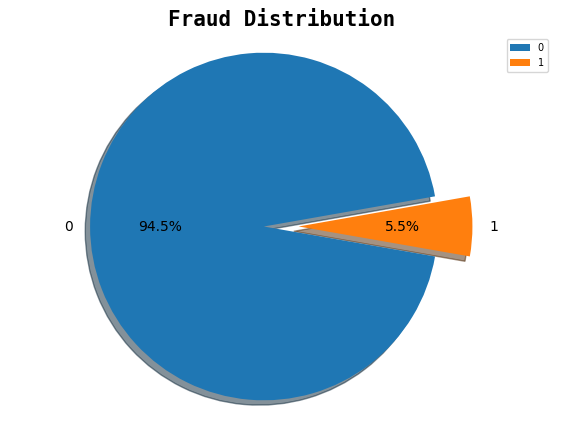

In [ ]:
# Creating a pie chart for 'Marital status'
marital = dataTrain['fraud'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20), shadow=True, autopct='%1.1f%%')
plt.title('Fraud Distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

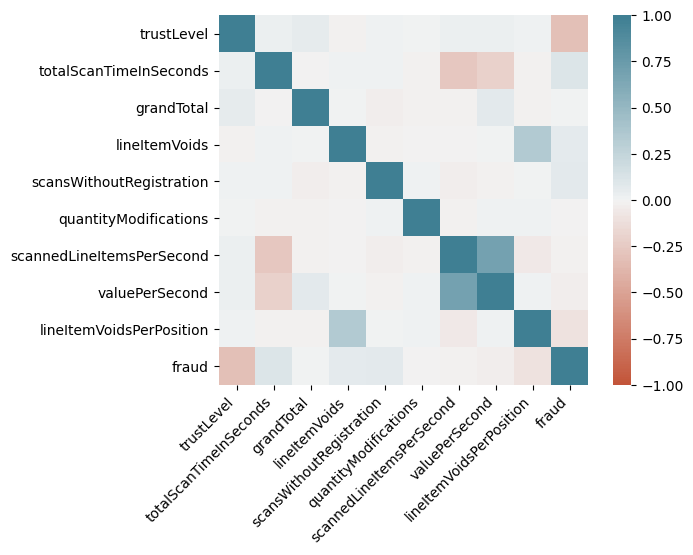

In [ ]:
mpl.rcParams['figure.dpi'] = 100
corr = dataTrain.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
dataTrain.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
trustLevel,1.000000,0.025264,0.047656,-0.017312,0.017296,0.006506,0.030701,0.027626,0.009241,-0.319765
totalScanTimeInSeconds,0.025264,1.000000,-0.001230,0.019068,0.009066,-0.011415,-0.262988,-0.208450,-0.011623,0.110414
grandTotal,0.047656,-0.001230,1.000000,0.006321,-0.030573,-0.008163,-0.011885,0.075679,-0.008858,0.001421
lineItemVoids,-0.017312,0.019068,0.006321,1.000000,-0.017023,-0.007173,-0.004438,0.005114,0.346514,0.063496
scansWithoutRegistration,0.017296,0.009066,-0.030573,-0.017023,1.000000,0.018961,-0.024126,-0.018844,0.002834,0.074123
quantityModifications,0.006506,-0.011415,-0.008163,-0.007173,0.018961,1.000000,-0.014880,0.010548,0.018318,-0.000864
scannedLineItemsPerSecond,0.030701,-0.262988,-0.011885,-0.004438,-0.024126,-0.014880,1.000000,0.692152,-0.056316,-0.023085
valuePerSecond,0.027626,-0.208450,0.075679,0.005114,-0.018844,0.010548,0.692152,1.000000,0.019886,-0.028873
lineItemVoidsPerPosition,0.009241,-0.011623,-0.008858,0.346514,0.002834,0.018318,-0.056316,0.019886,1.000000,-0.090116
fraud,-0.319765,0.110414,0.001421,0.063496,0.074123,-0.000864,-0.023085,-0.028873,-0.090116,1.000000


"totalScanTimeInSeconds", "grandTotal", "lineItemVoids", "scanWithoutRegistration"

##Combining

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dataTrain_len = len(dataTrain)
dataTrain = pd.concat([dataTrain, dataTest], axis = 0).reset_index(drop = True)

In [ ]:
dataTrain.shape

(500000, 10)

In [ ]:
dataTrain.head(5)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0.0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0.0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0.0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0.0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0.0


##Preprocessing

###detect outliers

In [ ]:
from collections import Counter

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

###Outliers

In [ ]:
dataTrain.loc[detect_outliers(dataTrain,["totalScanTimeInSeconds", "grandTotal", "lineItemVoids", "scansWithoutRegistration"])]

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud


###Mising Value

In [ ]:
dataTrain.isnull().sum()

trustLevel                        0
totalScanTimeInSeconds            0
grandTotal                        0
lineItemVoids                     0
scansWithoutRegistration          0
quantityModifications             0
scannedLineItemsPerSecond         0
valuePerSecond                    0
lineItemVoidsPerPosition          0
fraud                        498121
dtype: int64

In [ ]:
dataTrain_len

1879

In [ ]:
test = dataTrain[dataTrain_len:]
test.drop(labels = ["fraud"],axis = 1, inplace = True)

In [ ]:
np.any(np.isnan(dataTrain))
np.all(np.isfinite(dataTrain))

False

**Drop Kolom**

In [ ]:
dataTrain.drop(columns=['trustLevel', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition'], inplace=True)

In [ ]:
dataTrain.head(5)

,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,fraud
0,1054,54.70,7,0,0.0
1,108,27.36,5,2,0.0
2,1516,62.16,3,10,0.0
3,1791,92.31,8,4,0.0
4,430,81.53,3,7,0.0


#Prediction

In [ ]:
train = dataTrain[:dataTrain_len]
X_train = train.drop(labels = "fraud", axis = 1)
y_train = train["fraud"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 1258
X_test 621
y_train 1258
y_test 621
test 498121


**Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 95.79
Testing Accuracy: % 95.97


In [ ]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9610666666666667
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9387999999999999
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.9min finished


0.9705968253968255
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.968215873015873
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.9387999999999999


[Parallel(n_jobs=-1)]: Done 390 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.4s finished


Text(0.5, 1.0, 'Cross Validation Scores')

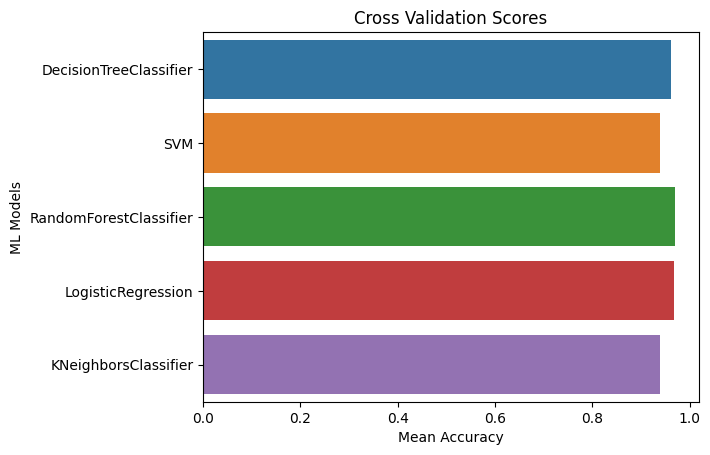

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [ ]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.9774557165861514


In [ ]:
testFraud = pd.Series(votingC.predict(test), name = "fraud").astype(int)
results = pd.concat([testFraud],axis = 1)
results.to_csv("fraud.csv", index = False)

In [ ]:
realclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498121 entries, 0 to 498120
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   fraud   498121 non-null  int64
dtypes: int64(1)
memory usage: 3.8 MB


In [ ]:
dataFraud = pd.read_csv('fraud.csv')
dataFraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498121 entries, 0 to 498120
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   fraud   498121 non-null  int64
dtypes: int64(1)
memory usage: 3.8 MB


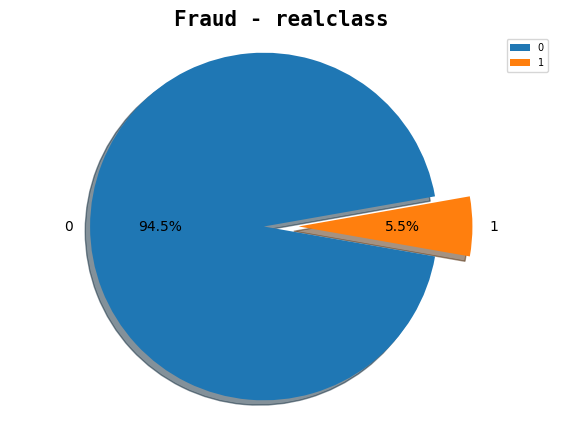

In [ ]:
# Creating a pie chart for 'Marital status'
fraud = realclass['fraud'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20), shadow=True, autopct='%1.1f%%')
plt.title('Fraud - realclass', fontdict={
          'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

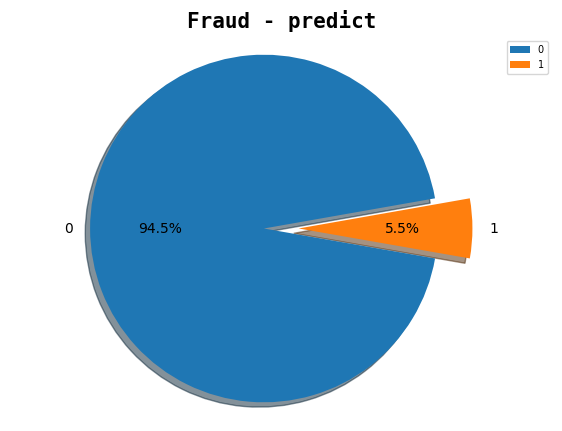

In [ ]:
# Creating a pie chart for 'Marital status'
fraud = dataFraud['fraud'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20), shadow=True, autopct='%1.1f%%')
plt.title('Fraud - predict', fontdict={
          'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()